### 🎓 **CELDA 1: Configuración del Entorno**

¡Bienvenidxs, arquitectxs del conocimiento! Antes de poder construir nuestros puentes hacia la solución de problemas complejos, necesitamos preparar el terreno y reunir nuestras herramientas. Como hemos discutido, pasaremos de la teoría a la práctica emocionante de cómo las máquinas realmente piensan y actúan.

Esta primera celda es nuestro "Paso 0": la cimentación de todo nuestro laboratorio. Aquí, no solo instalamos una herramienta, sino que traemos a nuestro entorno a **Fast Downward**, un planificador de última generación. Piensen en él como la "maquinaria inteligente" que tomará los planos y manuales que diseñemos en PDDL y los convertirá en secuencias de acciones con propósito. Este proceso de compilación, que solo se ejecuta una vez, nos dará la potencia necesaria para todos los experimentos que realizaremos juntos en esta travesía. ¡Preparen sus cascos, porque estamos listos para construir!

In [1]:
#CELDA 1

import os
import re
import subprocess
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from ipywidgets import interact, Textarea, Button, VBox, Output
from IPython.display import display



### ⚙️ **CELDA 2: Funciones de Ayuda para Planificar y Visualizar**

Mis estimados exploradores, todo buen arquitecto necesita un conjunto de herramientas fiables y versátiles. En esta celda, forjamos dos instrumentos cruciales para nuestra jornada.

1.  **`run_planner`**: Piensen en esta función como nuestra "interfaz universal" o el "traductor experto". Su diseño nos permite "conversar" con el potente motor de Fast Downward de una manera flexible y estandarizada. Lo más importante es que nos permitirá cambiar de estrategia con facilidad, ya sea pidiéndole que use una búsqueda heurística específica (como A\*) o que transforme el problema en un puzzle lógico para un motor SAT. Es la pieza clave que nos permitirá experimentar y comparar los diferentes paradigmas que hemos explorado en teoría.

2.  **`visualize_plan`**: La planificación automática nos da una "receta", una secuencia de acciones. Pero, ¿cómo es esa receta? Esta función es nuestra lupa, nuestra herramienta para transformar la abstracta lista de acciones del planificador en un diagrama claro y secuencial. Nos permitirá "ver el mapa y la ruta" que la IA ha diseñado, haciendo tangible y comprensible el resultado de su razonamiento.

Con estas dos funciones, estamos equipados no solo para resolver problemas, sino para entender y visualizar las soluciones.



In [2]:
#CELDA 2
# Función run_planner (Versión Final que maneja todos los casos)
import os
import re
import subprocess

def run_planner(domain_path, problem_path, alias=None, search_config=None):
    planner_path = "/home/vagrant/downward/fast-downward.py"
    if alias:
        # Los alias van ANTES de los ficheros de entrada
        command = [planner_path, "--alias", alias, domain_path, problem_path]
    elif search_config:
        # Las configuraciones de búsqueda van DESPUÉS de los ficheros de entrada
        command = [planner_path, domain_path, problem_path, "--search", search_config]
    else:
        # Comportamiento por defecto (para el primer ejercicio)
        command = [planner_path, "--alias", "lama-first", domain_path, problem_path]
        
    try:
        result = subprocess.run(command, capture_output=True, text=True, timeout=60)
        output = result.stdout
        
        if result.returncode != 0:
            print(f"El planificador falló con el código {result.returncode} para el comando: {' '.join(command)}")
            print(result.stderr)
            return None

        # El resto de la función para leer la salida
        plan_actions = re.findall(r'^(.*?) \(\d+\)$', output, re.MULTILINE)
        search_time = float(re.search(r'Search time: ([\d.]+)s', output).group(1))
        total_time = float(re.search(r'Total time: ([\d.]+)s', output).group(1))
        plan_cost = int(re.search(r'Plan cost: (\d+)', output).group(1))

        if "Solution found." in output:
            return {
                "plan": plan_actions, "cost": plan_cost,
                "search_time": search_time, "total_time": total_time, "output": output
            }
        else: return None
    except (subprocess.TimeoutExpired, AttributeError): return None
        
# --- Función de Ayuda para Visualizar Planes ---
def visualize_plan(plan_actions, title="Secuencia de Acciones del Plan"):
    """Crea una visualización del plan como un grafo secuencial."""
    dot = graphviz.Digraph(comment=title)
    dot.attr('graph', rankdir='LR', labelloc='t', label=title, fontsize='16')
    dot.attr('node', shape='box', style='rounded,filled', color='skyblue')

    dot.node('start', '🏁 Inicio')
    last_node = 'start'

    for i, action in enumerate(plan_actions):
        node_name = f'step_{i}'
        dot.node(node_name, f'Paso {i+1}:\n({action})')
        dot.edge(last_node, node_name)
        last_node = node_name

    dot.node('goal', '🏆 Meta')
    dot.edge(last_node, 'goal')
    return dot

### 🧱 **CELDA 3: ¡Nuestro Primer Plan! El Mundo de los Bloques**

¡Ha llegado el momento de la verdad, arquitectos! Es aquí donde nuestros planos teóricos se encuentran con la maquinaria para crear algo real. En esta celda, tomamos los dos ficheros que son el corazón del modelado en planificación:

* El **fichero de dominio** (`domain_blocks.pddl`): Nuestro "manual de instrucciones" que define la 'física' del Mundo de los Bloques.
* El **fichero de problema** (`problem_blocks.pddl`): El "plano de la misión" con la foto del estado inicial y el objetivo final que deseamos alcanzar.

Al ejecutar `run_planner`, le estamos entregando estos dos documentos a nuestro sistema inteligente. Si tiene éxito, el resultado no es un simple "resuelto", sino un **plan**: una secuencia coherente de acciones que transforma el mundo desde el inicio hasta la meta. La visualización que aparece es la prueba final, la "receta" creada por la IA para resolver el puzzle que le planteamos. ¡Hemos construido nuestro primer puente del conocimiento!



✅ ¡Plan encontrado con éxito en 0.0011 segundos!
Costo del plan: 4 acciones.


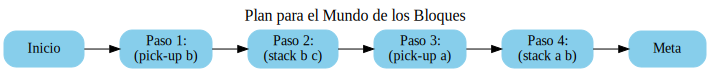

In [3]:
#CELDA 3
# Este código vuelve a funcionar porque la nueva función usa el alias por defecto correctamente.
blocks_result = run_planner('domain_blocks.pddl', 'problem_blocks.pddl')

if blocks_result:
    print(f"✅ ¡Plan encontrado con éxito en {blocks_result['search_time']:.4f} segundos!")
    print(f"Costo del plan: {blocks_result['cost']} acciones.")
    display(visualize_plan(blocks_result['plan'], "Plan para el Mundo de los Bloques"))
else:
    print("❌ No se encontró un plan.")

### 💡 **CELDA 4: Experimento de Eficiencia de Heurísticas**

Ahora que sabemos que nuestro planificador puede encontrar una solución, como buenos científicos nos preguntamos: ¿podría encontrarla de forma más inteligente o más rápida? Bienvenidos a nuestro laboratorio de heurísticas.

Como discutimos, el espacio de estados de un problema de planificación puede ser un "laberinto inmenso". Una búsqueda a ciegas sería inútil. Por eso, recurrimos a la **búsqueda heurística**. Las heurísticas son esas "brújulas" o "atajos" inteligentes que guían al planificador, permitiéndole podar ramas inútiles del árbol de búsqueda.

En esta celda, ponemos a prueba varias de las heurísticas basadas en relajación que vimos en clase, como `h_add`, `h_ff` y `h_max`. Comparamos el rendimiento del algoritmo **A\*** (que busca la solución óptima) con la **Búsqueda Avariciosa** (que es más rápida pero no garantiza optimalidad). El gráfico resultante no es solo una imagen bonita; es la evidencia empírica de cómo una buena "pista" puede hacer una diferencia monumental en la eficiencia para resolver el mismo problema.

Una vez que hagan clic en "Resolver Mi Problema", toda la maquinaria que hemos explorado se pondrá en marcha para intentar encontrar una solución a *su* puzzle. Esta es la culminación de nuestro viaje práctico, un espacio para que experimenten, prueben y solidifiquen su comprensión, demostrando que han dominado las herramientas para instruir a una IA a planificar. ¡Manos a la obra!

Ejecutando experimento de heurísticas...


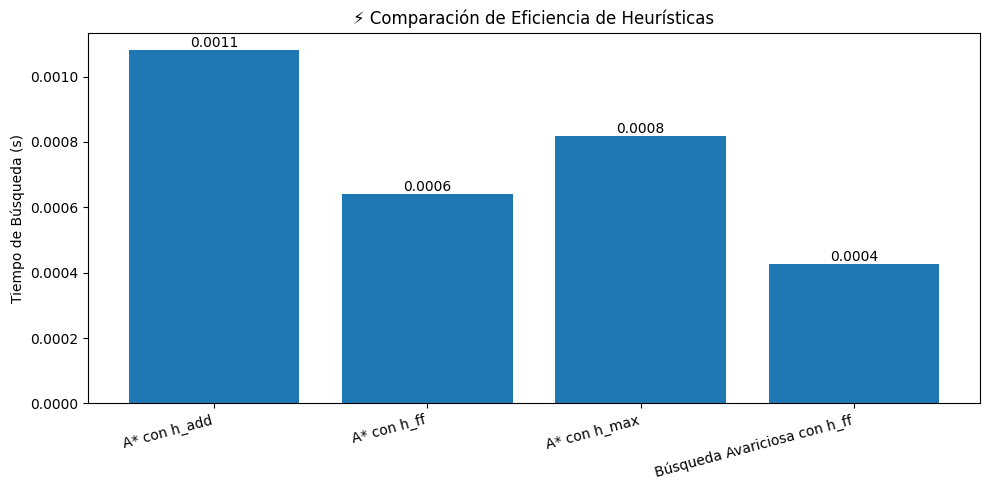

In [4]:
#CELDA 4
# Celda del Experimento de Heurísticas (Corregida)
heuristics_to_test = {
    "A* con h_add": "astar(add())",
    "A* con h_ff": "astar(ff())",
    "A* con h_max": "astar(hmax())",
    # CORRECCIÓN: ff() está ahora dentro de corchetes [ ]
    "Búsqueda Avariciosa con h_ff": "eager_greedy([ff()])" 
}
results = {}

print("Ejecutando experimento de heurísticas...")
for name, config in heuristics_to_test.items():
    res = run_planner('domain_blocks.pddl', 'problem_blocks.pddl', search_config=config)
    if res:
        results[name] = res['search_time']
    else:
        results[name] = 0
        
# La visualización (sin cambios)
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(list(results.keys()), list(results.values()))
ax.set_ylabel("Tiempo de Búsqueda (s)")
ax.set_title("⚡ Comparación de Eficiencia de Heurísticas")
plt.xticks(rotation=15, ha="right")
ax.bar_label(bars, fmt='%.4f')
plt.tight_layout()
plt.show()

### 📖 **CELDA 5: Explorando las Estrategias del Planificador (Alias)**

Mis queridos exploradores, demos un rápido vistazo "bajo el capó" de nuestra poderosa herramienta. Los planificadores modernos como Fast Downward no son una navaja simple, sino una navaja suiza con múltiples funciones preconfiguradas.

Esta celda ejecuta un comando para mostrarnos los **alias** disponibles. Piensen en cada alias como una "estrategia experta" o una "receta pre-cocinada" que combina un algoritmo de búsqueda específico con una heurística cuidadosamente seleccionada y optimizada por los creadores del planificador.

Al listar estos alias, no solo vemos la versatilidad de nuestra herramienta, sino que también confirmamos la existencia de diferentes enfoques, incluyendo las estrategias basadas en SAT (como `seq-sat-lama-2011`) que hemos discutido y que usaremos a continuación. Es una prueba de que estamos utilizando una herramienta robusta y de vanguardia.



In [5]:
#CELDA 5
!/home/vagrant/downward/fast-downward.py --show-aliases

lama
lama-first
seq-opt-bjolp
seq-opt-fdss-1
seq-opt-fdss-2
seq-opt-lmcut
seq-opt-merge-and-shrink
seq-sat-fd-autotune-1
seq-sat-fd-autotune-2
seq-sat-fdss-1
seq-sat-fdss-2
seq-sat-fdss-2014
seq-sat-fdss-2018
seq-sat-fdss-2023
seq-sat-lama-2011


### 🧩 **CELDA 6: La Planificación como un Puzzle Lógico (SAT)**

¡Cambiemos de perspectiva! Como les adelanté en nuestro discurso, ¿y si en lugar de buscar un camino, tratamos la planificación como un "gigantesco puzzle lógico"? Esta celda nos permite hacer exactamente eso.

Aquí, abandonamos la búsqueda heurística para abrazar el segundo gran paradigma: la **Planificación como Satisfactibilidad (SAT)**. Al invocar el alias `seq-sat-lama-2011`, le estamos pidiendo a Fast Downward que traduzca nuestro problema del Mundo de los Bloques en una masiva fórmula de lógica booleana y la entregue a un resolvedor SAT. Si el solver encuentra una forma de hacer la fórmula verdadera, ¡bingo, tenemos un plan!

Además, visualizamos un concepto crucial para que esta traducción funcione: la **exclusión mutua (mutex)**. El diagrama ilustra un conflicto fundamental (el brazo robótico no puede recoger dos bloques a la vez), una de las muchas reglas lógicas que deben codificarse en la fórmula SAT para asegurar que la solución sea válida en el mundo real. ¡Estamos presenciando la increíble sinergia entre la búsqueda y la lógica pura!



✅ ¡Plan encontrado con el motor SAT en 0.0110 segundos!


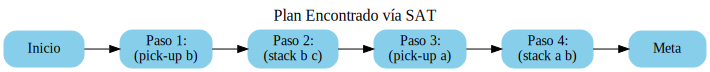

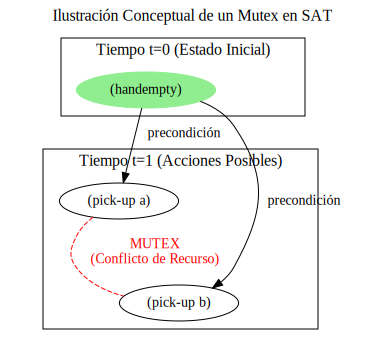

In [6]:
#CELDA 6
# @markdown ## 🧩 **Ejercicio 3: La Planificación como un Puzzle Lógico (SAT)**
# @markdown ### 1️⃣ **Resolver con un Planificador SAT**
# Usaremos la configuración `sat` de Fast Downward, que realiza esta transformación automáticamente.
# NOTA: En la nueva función, "sat" es un alias, por lo que usamos el parámetro 'alias'.
sat_result = run_planner('domain_blocks.pddl', 'problem_blocks.pddl', alias="seq-sat-lama-2011")
if sat_result:
    print(f"✅ ¡Plan encontrado con el motor SAT en {sat_result['search_time']:.4f} segundos!")
    display(visualize_plan(sat_result['plan'], "Plan Encontrado vía SAT"))
else:
    print("❌ El planificador SAT no encontró una solución.")

# @markdown ### 2️⃣ **Visualización Conceptual de un Mutex**
# Este diagrama ilustra la idea de un conflicto (mutex) entre dos acciones.
mutex_dot = graphviz.Digraph()
mutex_dot.attr('graph', labelloc='t', label='Ilustración Conceptual de un Mutex en SAT', fontsize='16')
with mutex_dot.subgraph(name='cluster_0') as c:
    c.attr(label='Tiempo t=0 (Estado Inicial)')
    c.node('handempty_0', '(handempty)', style='filled', color='lightgreen')

with mutex_dot.subgraph(name='cluster_1') as c:
    c.attr(label='Tiempo t=1 (Acciones Posibles)')
    c.node('pickup_a_1', '(pick-up a)')
    c.node('pickup_b_1', '(pick-up b)')

mutex_dot.edge('handempty_0', 'pickup_a_1', label='precondición')
mutex_dot.edge('handempty_0', 'pickup_b_1', label='precondición')
mutex_dot.edge('pickup_a_1', 'pickup_b_1', label='MUTEX\n(Conflicto de Recurso)', style='dashed', color='red', fontcolor='red', dir='none')

display(mutex_dot)

### 🤖 **CELDA 7: Demostrando la Flexibilidad: El Problema del Robot**

Una de las promesas más grandes de la planificación automática, y del uso de un lenguaje estándar como PDDL, es la **independencia del dominio**. ¿Qué significa esto? Que nuestro planificador no está "casado" con un solo tipo de problema.

Esta celda es la prueba viviente de ese principio. Usamos la *exactamente la misma función* `run_planner` que antes, pero esta vez la alimentamos con un dominio y un problema completamente diferentes: un robot que debe mover paquetes en un almacén. No hemos cambiado ni una línea de nuestro código de resolución; solo hemos cambiado los "planos" (los ficheros PDDL).

El sistema, sin conocimiento previo sobre robótica, es capaz de encontrar un plan de acción coherente. Las visualizaciones nos muestran tanto la "receta" de acciones como la ruta física del robot, demostrando el poder de nuestro enfoque para resolver problemas completamente nuevos con una elegancia y eficiencia asombrosas.


✅ ¡Plan robótico encontrado con éxito!


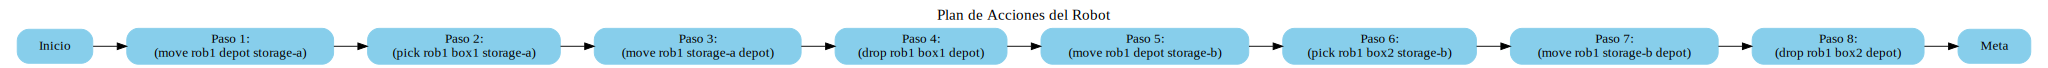

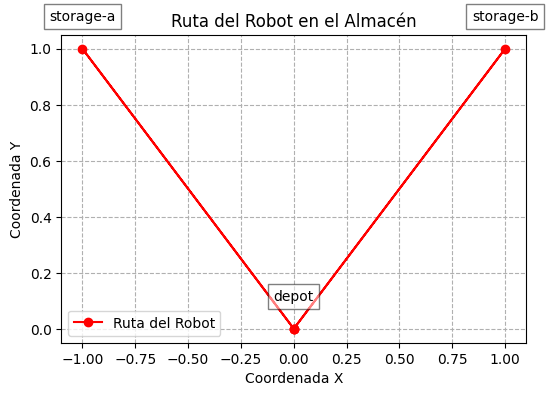

In [7]:
#CELDA 7
# @markdown ### 2️⃣ **Resolver y Visualizar la Ruta del Robot**
robot_result = run_planner('domain_robot.pddl', 'problem_robot.pddl')

if robot_result:
    print(f"✅ ¡Plan robótico encontrado con éxito!")
    # Visualización del Plan de Acciones
    display(visualize_plan(robot_result['plan'], "Plan de Acciones del Robot"))

    # Visualización de la Ruta en el mapa
    locations = {'depot': (0, 0), 'storage-a': (-1, 1), 'storage-b': (1, 1)}
    path = ['depot']
    for action in robot_result['plan']:
        if action.startswith('move'):
            path.append(action.split()[-1].replace(')','')) # Extrae la ubicación de destino

    x_coords = [locations[p][0] for p in path]
    y_coords = [locations[p][1] for p in path]

    plt.figure(figsize=(6, 4))
    plt.plot(x_coords, y_coords, 'ro-', label='Ruta del Robot')
    for name, (x, y) in locations.items():
        plt.text(x, y + 0.1, name, ha='center', bbox=dict(facecolor='white', alpha=0.5))
    plt.title("Ruta del Robot en el Almacén")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.show()

### 🎮 **CELDA 8: ¡Bonus Interactivo! Tú eres el Arquitecto**

¡Ahora el poder está en sus manos, mis queridos arquitectos del conocimiento! A lo largo de este cuaderno, hemos construido puentes desde la teoría hasta la práctica. Hemos visto cómo modelar un problema y cómo una IA puede resolverlo. Este es el paso final de nuestra travesía: ahora, **ustedes son los diseñadores**.

Esta celda interactiva les entrega el lienzo en blanco. Pueden tomar la definición del problema en PDDL y modificarla a su antojo: cambien la disposición inicial de los bloques, definan un objetivo completamente nuevo, añadan o quiten objetos. Creen su propio desafío.



In [8]:
#CELDA 8
# @markdown ## 🎮 **Bonus: ¡Juego Interactivo!**
# @markdown **Objetivo**: Diseña y resuelve tu propio problema de planificación.

from ipywidgets import Textarea, Button, VBox, Output
from IPython.display import display

problem_input = Textarea(
    value="(define (problem my-custom-problem)\n  (:domain blocksworld)\n  (:objects a b c d - block)\n  (:init\n    (ontable a) (ontable b) (ontable c) (ontable d)\n    (clear a) (clear b) (clear c) (clear d)\n    (handempty)\n  )\n  (:goal (and (on d c) (on c b) (on b a)))\n)",
    placeholder='Escribe tu problema PDDL aquí...',
    description='PDDL:',
    layout={'height': '200px', 'width': '95%'}
)

run_button = Button(description="🚀 Resolver Mi Problema")
output_area = Output()

def run_custom_problem(b):
    with output_area:
        output_area.clear_output()
        problem_pddl = problem_input.value
        with open("custom_problem.pddl", "w") as f:
            f.write(problem_pddl)
        
        print("Intentando resolver tu problema personalizado...")
        # Usamos el alias por defecto que sabemos que funciona
        custom_result = run_planner('domain_blocks.pddl', 'custom_problem.pddl')
        
        if custom_result:
            print(f"✅ ¡Solución encontrada para tu problema!")
            display(visualize_plan(custom_result['plan'], "Plan para Problema Personalizado"))
        else:
            print("❌ No se pudo encontrar una solución. Revisa la sintaxis de tu PDDL o si el problema es resoluble.")

run_button.on_click(run_custom_problem)
print("Define tu problema y haz clic en el botón para resolverlo:")
display(VBox([problem_input, run_button, output_area]))

Define tu problema y haz clic en el botón para resolverlo:


  CELDA 9: Introducción a la Actividad de Planificación Logística

  Mis estimados estrategas, ahora aplicaremos todo lo aprendido a un problema concreto y evaluable: la Actividad de Planificación Logística propuesta en el documento del
  curso. El objetivo es claro: modelar un escenario específico, resolverlo usando A* y analizar las estructuras internas del proceso de planificación.

  En las siguientes celdas, construiremos paso a paso los artefactos de código necesarios para resolver la parte práctica de esta tarea, lo que les dará una base sólida
  para luego completar el análisis teórico que se requiere en el informe.

  El Problema: Como se describe en el PDF, debemos transportar el paquete1 desde la ciudad1 hasta la ciudad3. Sin embargo, no hay una ruta directa. Un camion1, que empieza
   en la ciudad2, debe realizar la tarea.


  CELDA 10: Paso 1 (Parte A) - Modelado del Dominio PDDL

  El primer paso es traducir las "reglas del mundo" a PDDL. Crearemos un dominio simple para este problema logístico. Solo tendremos un tipo de objeto (localizacion) y un
  vehículo (camion). Las acciones serán sencillas: mover, cargar y descargar.

  Este código generará el archivo actividad-domain.pddl con la física de nuestro mundo.


In [9]:
 # CELDA 10
 
 domain_pddl_content = """
 (define (domain logistica-actividad)
   (:requirements :strips :typing)
   
   (:types ; 
     paquete camion localizacion - object
   )
   
   (:predicates
     (en-paquete ?p ?l)      ; El paquete ?p está en la localización ?l
     (en-camion ?c ?l)       ; El camión ?c está en la localización ?l
     (paquete-en-camion ?p ?c) ; El paquete ?p está dentro del camión ?c
     (conectado ?l1 ?l2)     ; La localización ?l1 está conectada con ?l2
   )
 
   (:action mover
     :parameters (?c ?desde ?hacia)
     :precondition (and (en-camion ?c ?desde) (conectado ?desde ?hacia))
     :effect (and (not (en-camion ?c ?desde)) (en-camion ?c ?hacia))
   )
 
   (:action cargar
     :parameters (?p ?c ?l)
     :precondition (and (en-paquete ?p ?l) (en-camion ?c ?l))
     :effect (and (not (en-paquete ?p ?l)) (paquete-en-camion ?p ?c))
   )
 
   (:action descargar
     :parameters (?p ?c ?l)
     :precondition (and (paquete-en-camion ?p ?c) (en-camion ?c ?l))
     :effect (and (not (paquete-en-camion ?p ?c)) (en-paquete ?p ?l))
   )
 )
 """
 
 try:
     with open("actividad-domain.pddl", "w") as f:
         f.write(domain_pddl_content)
     print("✅ Archivo 'actividad-domain.pddl' creado con éxito." )
 except Exception as e:
     print(f"❌ Error al crear el archivo:  {e}")

 


✅ Archivo 'actividad-domain.pddl' creado con éxito.


  CELDA 11: Paso 1 (Parte B) - Modelado del Problema PDDL

  Ahora definimos el escenario exacto de la actividad, tal como se muestra en la Figura 1 del PDF. Establecemos los objetos (ciudades, paquete, camión), el estado inicial
  y la meta final.

  Este código generará el archivo actividad-problem.pddl.


In [10]:
 # CELDA 11
 
 problem_pddl_content = """
 (define (problem problema-logistica-1)
   (:domain logistica-actividad)
 
   (:objects
     paquete1 - paquete
     camion1 - camion
     ciudad1 ciudad2 ciudad3 ciudad4 - localizacion
   )
 
   (:init
     ; Estado inicial del problema
     (en-paquete paquete1 ciudad1)
     (en-camion camion1 ciudad2)
 
     ; Conexiones entre ciudades (bidireccionales)
     (conectado ciudad1 ciudad2)
     (conectado ciudad2 ciudad1)
     (conectado ciudad2 ciudad3)
     (conectado ciudad3 ciudad2)
     (conectado ciudad1 ciudad4)
     (conectado ciudad4 ciudad1)
     (conectado ciudad3 ciudad4)
     (conectado ciudad4 ciudad3)
   )
 
   (:goal
     (and (en-paquete paquete1 ciudad3))
   )
 )
 """
 
 try:
     with open("actividad-problem.pddl", "w") as f:
         f.write(problem_pddl_content)
     print("✅ Archivo 'actividad-problem.pddl' creado con éxito." )
 except Exception as e:
     print(f"❌ Error al crear el archivo:  {e}")




✅ Archivo 'actividad-problem.pddl' creado con éxito.


CELDA 12: Paso 2 - Resolución con A* y Plan Óptimo

  Ahora resolvemos el problema. Usaremos A* con una heurística admisible potente (`lmcut`) para asegurarnos de encontrar el *plan óptimo*, que es el que los estudiantes
  deberían obtener tras su análisis manual.

  Nota Importante para el Estudiante: La actividad les pide desarrollar el árbol de búsqueda de A* *manualmente, usando la heurística simple definida en el PDF. Este es un
   ejercicio teórico "en papel". El siguiente código no reemplaza ese trabajo, sino que les confirma cuál es el plan correcto y óptimo* al que deben llegar con su
  análisis.


🔎 Resolviendo el problema de la actividad con A*(lmcut) para encontrar el plan óptimo...
✅ ¡Plan óptimo para la actividad encontrado!
Costo del plan: 5 acciones.


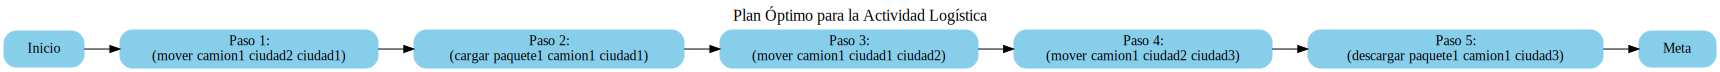

In [11]:
# CELDA 12

print("🔎 Resolviendo el problema de la actividad con A*(lmcut) para encontrar el plan óptimo...")

# Usamos astar(lmcut) porque es una configuración óptima robusta.
activity_result = run_planner('actividad-domain.pddl', 'actividad-problem.pddl', search_config="astar(lmcut())")

if activity_result:
    print(f"✅ ¡Plan óptimo para la actividad encontrado!" )
    print(f"Costo del plan: {activity_result['cost']} acciones.")
    display(visualize_plan(activity_result['plan'], "Plan Óptimo para la Actividad Logística"))
else:
    print("❌ No se encontró un plan para el problema de la actividad." )


  CELDA 13: Paso 3 - Visualización de Relaciones Mutex

  El Paso 3 de la actividad pide desarrollar un grafo de planificación e identificar relaciones mutex (acciones o proposiciones que no pueden ser ciertas al mismo tiempo).
   Construir el grafo completo es un ejercicio teórico, pero podemos visualizar los tipos de mutex que se mencionan para facilitar su comprensión.

  A continuación, se generan diagramas conceptuales para los tipos de mutex más importantes en el contexto de nuestro problema logístico.


--- Visualizaciones Conceptuales de Relaciones Mutex ---


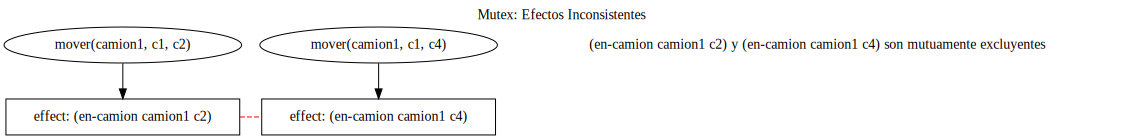

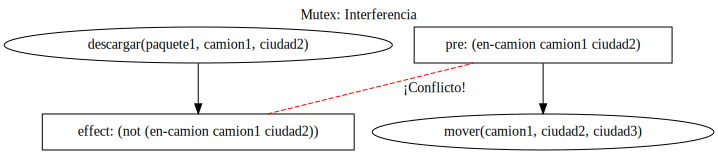

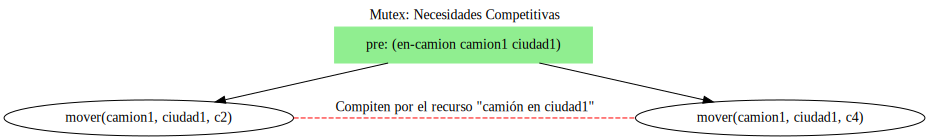

In [12]:
# CELDA 13

# 1. Mutex por Efectos Inconsistentes
# Una acción afirma un hecho P, y otra afirma (not P).
# Ejemplo: mover el camión a c2 y moverlo a c4 al mismo tiempo.
dot1 = graphviz.Digraph(comment="Efectos Inconsistentes")
dot1.attr('graph', label='Mutex: Efectos Inconsistentes', labelloc='t', fontsize='14')
dot1.node('A1', 'mover(camion1, c1, c2)')
dot1.node('A2', 'mover(camion1, c1, c4)')
dot1.node('E1', 'effect: (en-camion camion1 c2)', shape='box')
dot1.node('E2', 'effect: (en-camion camion1 c4)', shape='box')
dot1.node('Conflict', '❌ (en-camion camion1 c2) y (en-camion camion1 c4) son mutuamente excluyentes' , shape='plaintext')
dot1.edge('A1', 'E1')
dot1.edge('A2', 'E2')
dot1.edge('E1', 'E2', style='dashed', color='red', dir='none', constraint='false')

# 2. Mutex por Interferencia
# Una acción niega una precondición de la otra.
# Ejemplo: descargar(p1,c1,c2) niega la precondición (en-camion c1 c2) de mover(c1,c2,c3)
dot2 = graphviz.Digraph(comment="Interferencia")
dot2.attr('graph', label='Mutex: Interferencia', labelloc='t', fontsize='14')
dot2.node('A1', 'descargar(paquete1, camion1, ciudad2)')
dot2.node('A2', 'mover(camion1, ciudad2, ciudad3)')
dot2.node('P2', 'pre: (en-camion camion1 ciudad2)', shape='box')
dot2.node('E1', 'effect: (not (en-camion camion1 ciudad2))', shape='box')
dot2.edge('A1', 'E1')
dot2.edge('P2', 'A2')
dot2.edge('E1', 'P2', style='dashed', color='red', dir='none', constraint='false', label='  ¡Conflicto!')

# 3. Mutex por Necesidades Competitivas
# Dos acciones requieren la misma precondición que una acción previa podría borrar.
# Ejemplo: mover a c2 y mover a c4 compiten por la precondición (en-camion camion1 c1)
dot3 = graphviz.Digraph(comment="Necesidades Competitivas")
dot3.attr('graph', label='Mutex: Necesidades Competitivas', labelloc='t', fontsize='14')
dot3.node('P', 'pre: (en-camion camion1 ciudad1)', shape='box', style='filled', color='lightgreen')
dot3.node('A1', 'mover(camion1, ciudad1, c2)')
dot3.node('A2', 'mover(camion1, ciudad1, c4)')
dot3.edge('P', 'A1')
dot3.edge('P', 'A2')
dot3.edge('A1', 'A2', style='dashed', color='red', dir='none', constraint='false', label='Compiten por el recurso "camión en ciudad1"')


print("--- Visualizaciones Conceptuales de Relaciones Mutex ---")
display(dot1)
display(dot2)
display(dot3)